# Assignment 1

Fakhrurrozi (PYTN-KS14-018)

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import folium


In [14]:
df = pd.read_csv("london_crime_by_lsoa.csv")

data ini memiliki 7 kolom yang terdiri dari

    lsoa_code : mewakili area kepolisian
    borough : borough london yang terkait dengan statistik
    major_category : kategori kejahatan besar
    minor_category : kategori kejahatan ringan
    value : hitungan kejahatan untuk wilayah tertentu, pada bulan tertentu
    year : tahun ringkasan statistik
    month : bulan statistik ringkasan

In [15]:
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [16]:
df.shape

(13490604, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


data diatas, terdiri dari 2 tipe data. Yaitu Object dan int64

Object itu string, dan int64 itu numerik.

object : lsoa_code, borough, major_category, minor_category

int64 : value, year, month

In [18]:
print(df.isnull().any())

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool


In [33]:
df.duplicated().sum()

0

tidak ada data duplikat

In [19]:
df.describe

<bound method NDFrame.describe of           lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                

# Area Plot

In [20]:
matplotlib.style.use(['ggplot'])

Text(0.5, 1.0, 'minor crime in London 2008-2016')

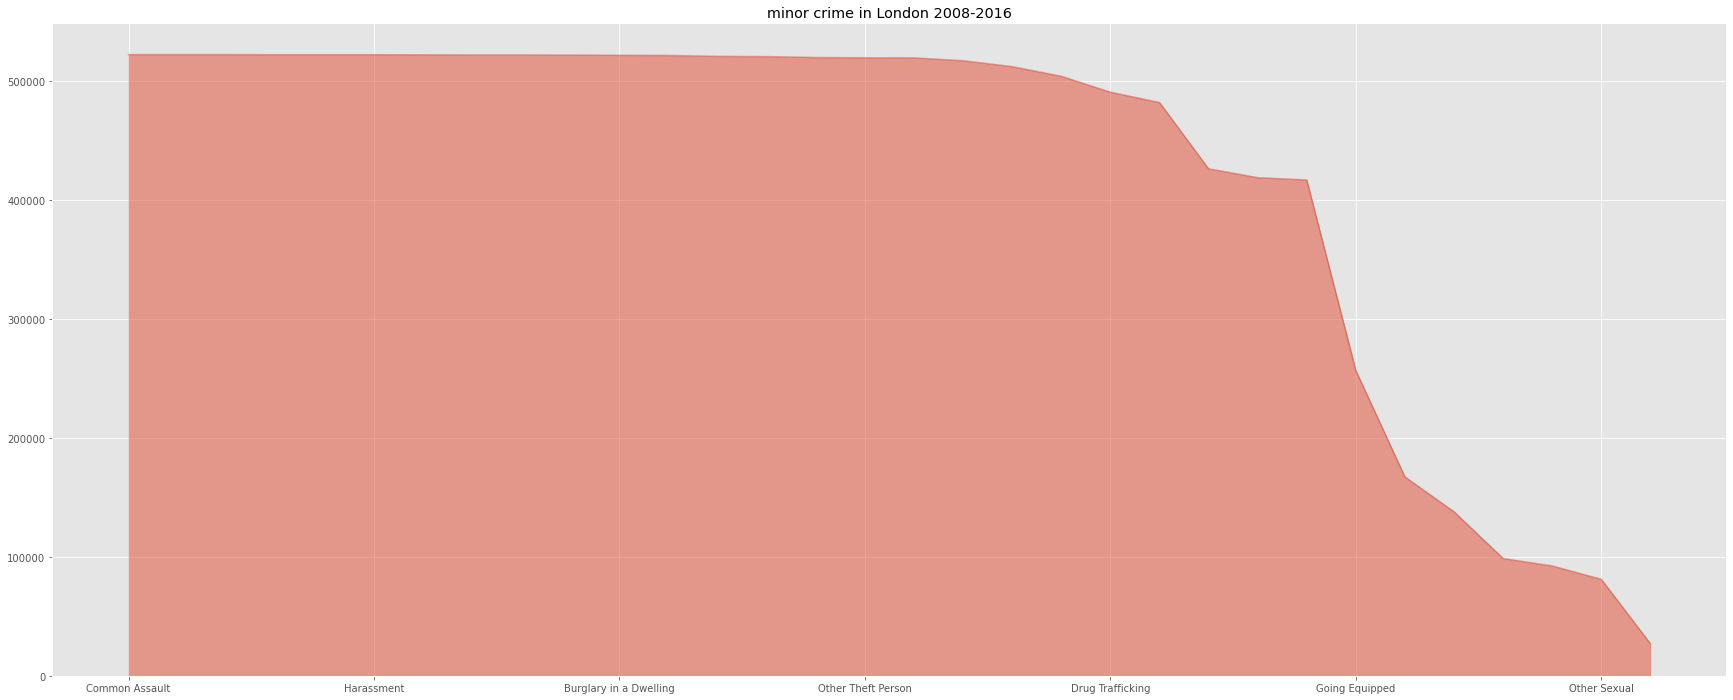

In [21]:
df['minor_category'].value_counts().plot(kind='area', stacked=False, figsize=(30,12))
plt.title('minor crime in London 2008-2016')

Pada visualisasi diatas dapat dilihat kejahatan dalam kategori minor paling banyak mengorbankan individu seperti Common Assault, Harrassment, Other Theft Person, Other Sexual

# Histogram

In [22]:
df_hist = df[['borough', 'minor_category']].\
groupby('borough')['minor_category'].value_counts()

Text(0.5, 1.0, 'minor crime in City of London')

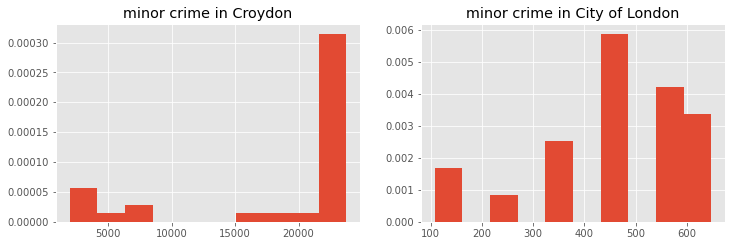

In [23]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.hist(df_hist["Croydon"], density = True)
plt.title("minor crime in Croydon")
plt.subplot(2,2,2)
plt.hist(df_hist["City of London"], density = True)
plt.title("minor crime in City of London")

Pada visualisasi diatas merupakan kejahatan kategori minor di daerah Croydon dan City of London 

# Bar chart

Text(0, 0.5, 'Number of Crime')

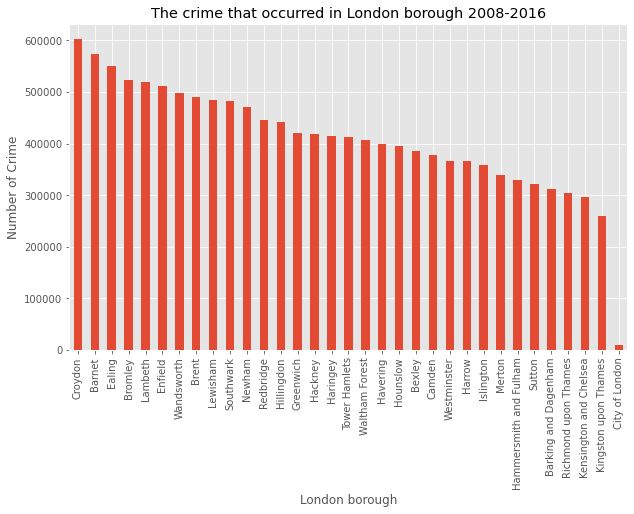

In [24]:
df.borough.value_counts().plot(kind='bar', figsize=(10,6))

plt.title('The crime that occurred in London borough 2008-2016')
plt.xlabel('London borough')
plt.ylabel('Number of Crime')


Dari visualisai di atas dapat terlihat wiliyah City of London yang paling sedikit terjadi kejahatan, dapat dibiling wilayah City of London merupakan wilayah yang paling aman, dibandingkan dengan wilayah yang lainnya

# Pie chart

In [25]:
data = pd.DataFrame(df['major_category'].value_counts())

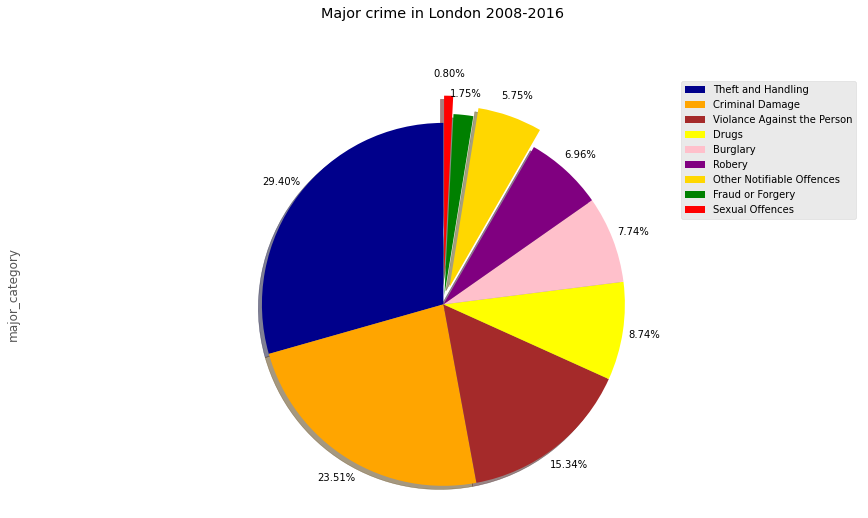

In [32]:
colors_list = ['darkblue', 'orange', 'brown', 'yellow', 'pink', 'purple', 'gold', 'green', 'red']

explode_list = [0, 0, 0, 0, 0, 0, 0.1, 0.05, 0.15]

data['major_category'].plot(kind='pie', figsize=(15,8), autopct="%1.2f%%", startangle=90, shadow=True, 
                            labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
plt.title('Major crime in London 2008-2016', y=1.12)
plt.axis('equal')
plt.legend(['Theft and Handling', 'Criminal Damage', 'Violance Against the Person', 'Drugs', 
'Burglary', 'Robery', 'Other Notifiable Offences', 'Fraud or Forgery', 'Sexual Offences'])
plt.show()  

Pada visualisai di atas kehajatan yang terjadi di major category ini kejahatan yang paling banyak terjadi adalah Theft and Handling, kejahatan pada kategori ini juga banyak mengorbankan individu

# Box plot

In [27]:
df_london = df[['borough', 'major_category']].\
groupby('borough')['major_category'].value_counts()

In [28]:
df_london.head(10)

borough               major_category             
Barking and Dagenham  Theft and Handling              91260
                      Violence Against the Person     73224
                      Criminal Damage                 46764
                      Drugs                           26244
                      Burglary                        23760
                      Robbery                         22248
                      Other Notifiable Offences       17496
                      Fraud or Forgery                 7236
                      Sexual Offences                  2808
Barnet                Theft and Handling             171180
Name: major_category, dtype: int64

Text(0.5, 1.0, 'Crime in Croydon 2008-2016')

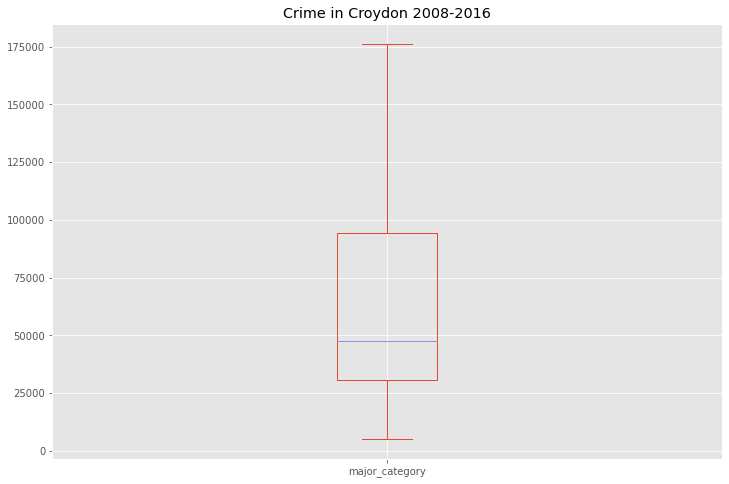

In [29]:
df_Croydon = df_london.loc['Croydon']
df_Croydon.plot(kind='box', figsize=(12,8))
plt.title('Crime in Croydon 2008-2016')

Observasi berdasarkan visualisasi diatas:
- Jumlah minimumnya sekitar 5000(min), jumlah maximum sekitar 176000(max), dan mediannya sekitar 47000(median)
- 25% dari tahun 2008-2016 memiliki jumlah sekitar 30000(pada quartile pertama)
- 75% dari tahun 2008-2016 memiliki jumlah sekitar 94000(pada quartile ke 3)

# Scatter plot

<Figure size 1224x648 with 0 Axes>

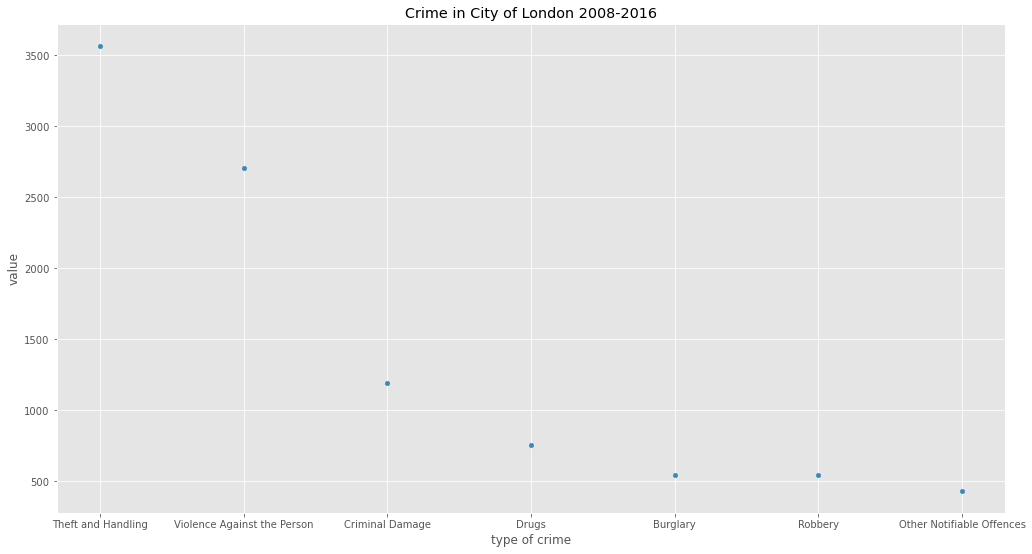

In [41]:

data_city = pd.DataFrame(df_london['City of London'])
data_city.rename(columns={'major_category': 'value'}, inplace=True)

crime_types = [
    "Theft and Handling", "Violence Against the Person", "Criminal Damage",
    "Drugs", "Burglary", "Robbery", "Other Notifiable Offences"
]

data_city["type of crime"] = crime_types

plt.figure(figsize=(17, 9))
data_city.plot(kind='scatter', x='type of crime', y='value', figsize=(17, 9))
plt.title('Crime in City of London 2008-2016')
plt.show()


Pada Visualisasi diatas adalah kejahatan kategori major yang ada di daerah City of London Theft and Handling merupakan kejahatan yang paling banyak terjadi di daerah tersebut